In [1]:
import numpy as np

def eigen_analysis(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    # A⋅v=λ⋅v
    for i in range(len(eigenvalues)):
        lambda_v = eigenvalues[i] * eigenvectors[:, i]
        A_v = np.dot(matrix, eigenvectors[:, i])
        if not np.allclose(lambda_v, A_v):
            print(f"Check failed for λ: {eigenvalues[i]} & v: {eigenvectors[:, i]}")
        else:
            print(f"Check successed for λ: {eigenvalues[i]} & v: {eigenvectors[:, i]}")
    
    return eigenvalues, eigenvectors

matrix = np.array([[4, 1], [2, 3]])
eigenvalues, eigenvectors = eigen_analysis(matrix)
print("Eigen values: ", eigenvalues)
print("Eigen vectors:\n", eigenvectors)


Check successed for λ: 5.0 & v: [0.70710678 0.70710678]
Check successed for λ: 2.0 & v: [-0.4472136   0.89442719]
Eigen values:  [5. 2.]
Eigen vectors:
 [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


(3000, 4000, 3)


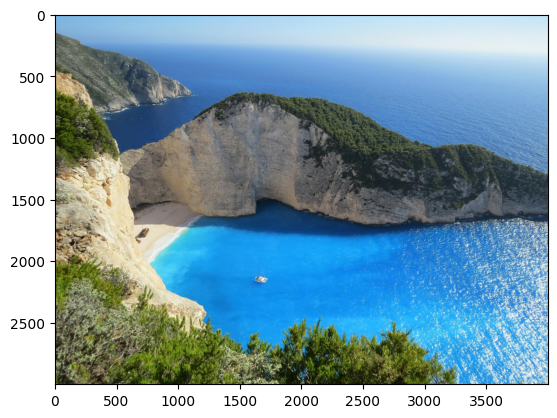

In [21]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

im_raw = imread("image.jpg")
print(im_raw.shape)
plt.imshow(im_raw)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.decomposition import PCA
from skimage import io, color

def process_image_with_pca():
    image = imread("image.jpg")
    
    height, width, channels = image.shape
    print(f"Image size: {width}x{height}")
    print(f"Amount of channels: {channels}")

    gray_image = color.rgb2gray(image)
    
    height_gray, width_gray = gray_image.shape
    print(f"Size of white-black image: {width_gray}x{height_gray}")
    print(f"Amount of channels: 1")
    
    plt.imshow(gray_image)
    plt.title("Gray ")
    plt.axis("off")
    plt.show()

    reshaped_image = gray_image.reshape(-1, 1)
    pca = PCA()
    pca.fit(reshaped_image)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    n_components_95 = np.argmax(cumulative_variance) + 1

    plt.plot(cumulative_variance, marker='o')
    plt.title("PCA")
    plt.xlabel("Amount of components")
    plt.ylabel("Cumulative disperion")
    plt.axhline(y=0.95, color='r', linestyle='--')
    plt.axvline(x=n_components_95, color='r', linestyle='--')
    plt.show()
    
    print(f"Кількість компонентів, які покривають 95% дисперсії: {n_components_95}")


process_image_with_pca()

Image size: 4000x3000
Amount of channels: 3


ValueError: not enough values to unpack (expected 3, got 2)